In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft

df = pd.read_csv('../../Waveforms/25072024/25072024_17.23/17.23_wf_250724.csv/wf_17.23_250724_01.csv')
data = df.to_numpy()
print(data[:1])
data = data[1:]
print(data)


[['(ms)' '(V)']]
[['0.00000000' '0.00000000']
 ['0.00100480' '0.00000000']
 ['0.00200960' '0.00000000']
 ...
 ['100.00070736' '-0.00787402']
 ['100.00171216' '0.00787402']
 ['100.00271696' '0.01574803']]


In [2]:
data_float = data.astype(float)
times = data_float[1:, 0]
print(f"Times: {times}")

amplitudes = data_float[1:, 1]
print(f"Amplitudes: {amplitudes}")

Times: [1.00480000e-03 2.00960000e-03 3.01440000e-03 ... 1.00000707e+02
 1.00001712e+02 1.00002717e+02]
Amplitudes: [ 0.          0.         -0.00787402 ... -0.00787402  0.00787402
  0.01574803]


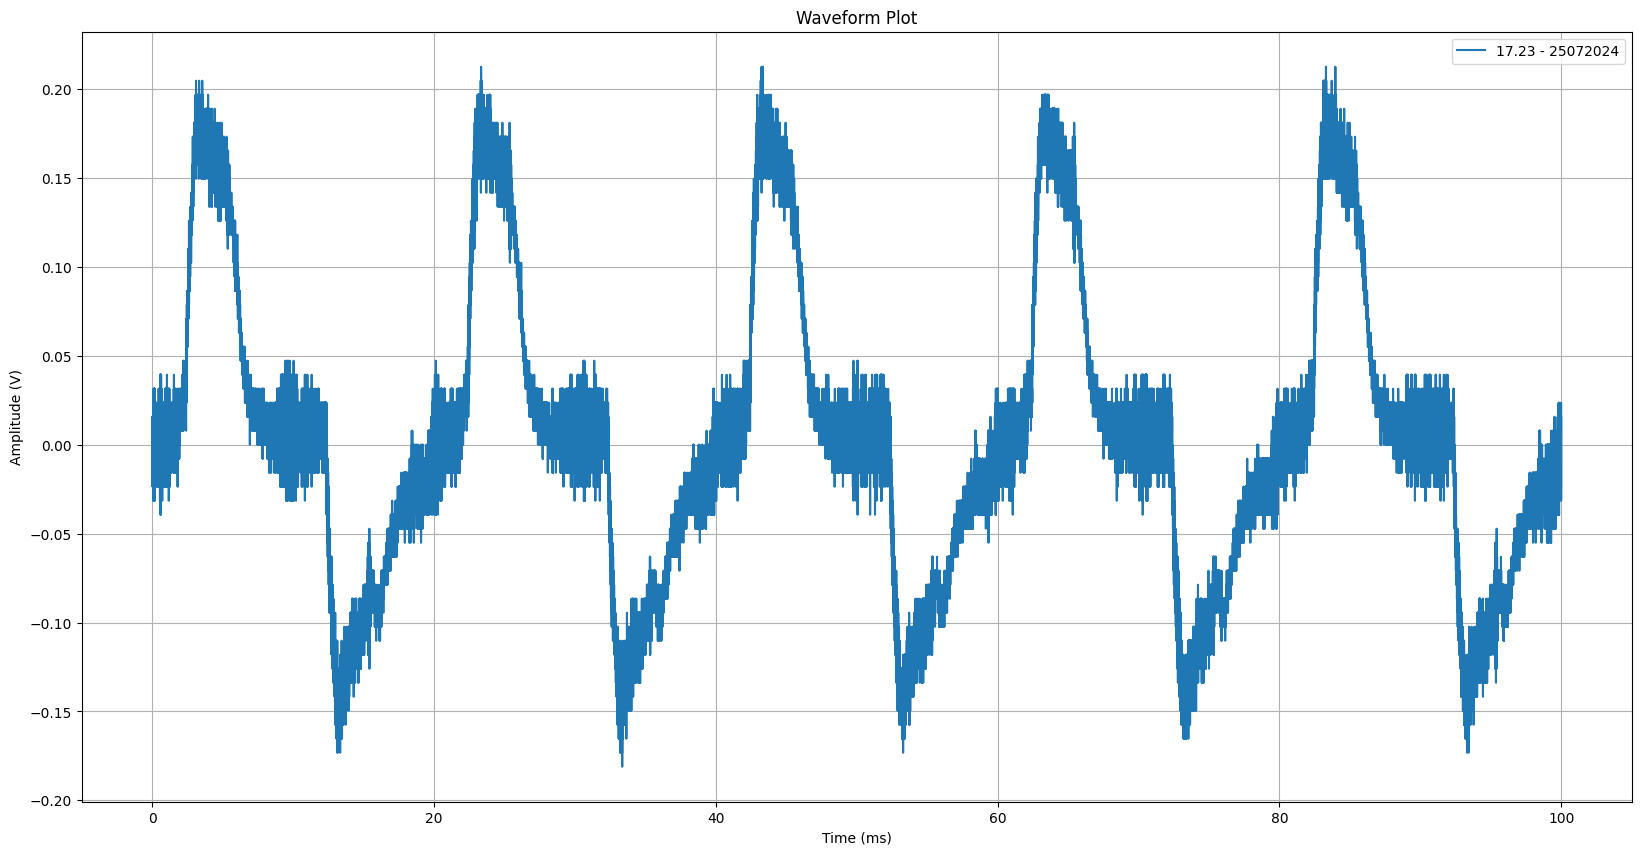

In [5]:
plt.figure(figsize=(20, 10))
plt.plot(times, amplitudes, label='17.23 - 25072024')
plt.title('Waveform Plot')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (V)')
plt.legend()
plt.grid(True)
plt.show()

[3.60994966 7.87323321 0.97848239 ... 0.97848239 7.87323321 3.60994966]
[ 10047.72670183  20095.45340367  30143.1801055  ... -30143.1801055
 -20095.45340367 -10047.72670183]


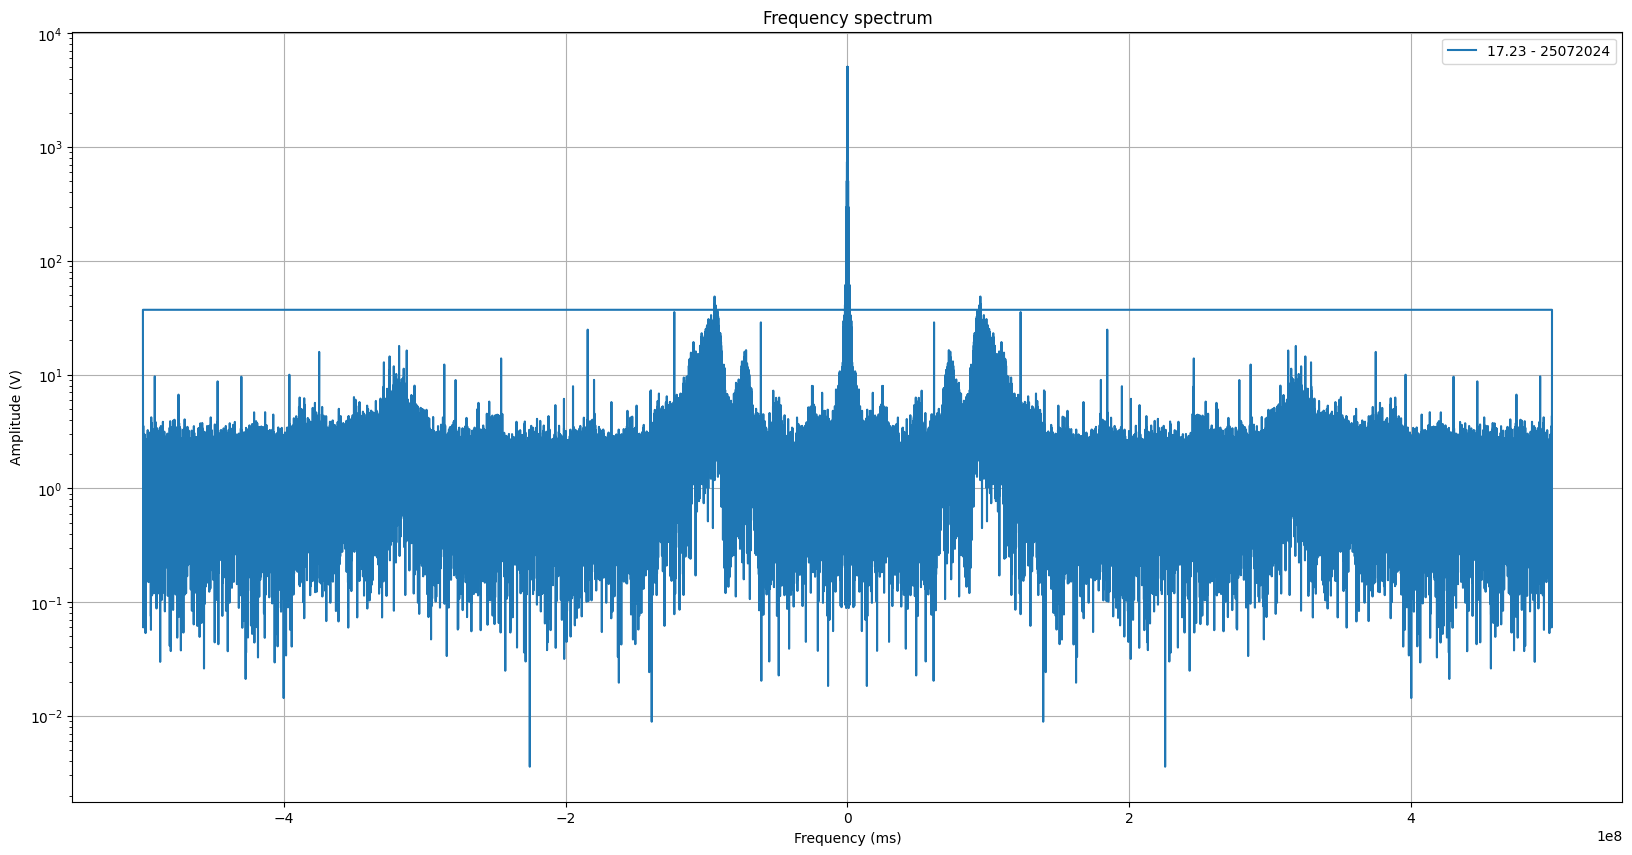

In [8]:
A = fft.fft(amplitudes)
print(abs(A)[1:])
f_s = 10**9
freqs = fft.fftfreq(len(amplitudes), 1/f_s)
print(freqs[1:])

plt.figure(figsize=(20, 10))
plt.plot(freqs, np.abs(A), label='17.23 - 25072024')
plt.title('Frequency spectrum')
plt.xlabel('Frequency (ms)')
plt.ylabel('Amplitude (V)')
plt.legend()
plt.semilogy()
plt.xlim(0, 1)
plt.grid(True)
plt.show()